## Learning Exercise 1

### Import Modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

### Grading Rubric

Creation of visualizations are each worth 3 points. All other questions are 1 point each. It's possible to get partial-credit on the visualizations if you present work close to the best answer.

You'll get docked/lose points if any of the following things exist with your submission:

- wrong file type submission
- incorrect naming of file
- blank lines in code blocks
- multiple visualizations for an answer when I only ask for one
- repeated imports of modules
- excess output like printing a dataframe or extra matplotlib text; get my attention during this exercise if you're struggling to fix it
- incorrect or nonsensical names of axes, legends, titles, etc
- one character spacing between arguments in a method call. Acceptable: `sns.boxplot(x="day", y="total_bill", data=tips)`. Unacceptable: `sns.boxplot(x="day",y="total_bill",data=tips)`

### Titanic Dataset

The Titanic is a well-known ship that sunk on its maiden voyage in 1912 after collision with an iceberg. Many were killed in the incident. You may recognize this name from the movie with Leonardo DiCaprio. 

https://www.kaggle.com/c/titanic/data

Below are just a few fields you'll need for analysis.

#### Data Dictionary

Variable | Defintion | Key
--- | --- | ---
Age | Age (in years) |
who | person type/characterization |

Each row/record in the dataset represents characteristics for a unique person.

#### Question 1: Read in dataset using Seaborn and assign to variable

You can use this code snippet to read in the dataset: `sns.load_dataset('titanic')`

In [3]:
df = sns.load_dataset('titanic')

#### Question 2: Can you write code to preview the first 5 rows/records of this dataset?

You can use the following method: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### Question 3: Plot a box plot of the age distribution of people on the Titanic using Seaborn

- Orientation of box plot should be horizontal
- X-axis should be age. 
- Include a relevant title
- Make the plot's figure size 14 inches wide by 6 inches in height
- Make the font sizes larger for: title, x-ticks and x-label

To adjust figure size: https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html

You may need to filter the dataframe by a specific column. If you don't know how, you can see an example here: https://chrisalbon.com/python/data_wrangling/filter_dataframes/

Hint: if you use Matplotlib, Pandas Plot or Seaborn, you can use `sns.set_context("talk")` to make all fonts scaled to be larger (see https://seaborn.pydata.org/tutorial/aesthetics.html)

Seaborn's box plot functionality is great! However, make sure to filter out null age values! https://seaborn.pydata.org/generated/seaborn.boxplot.html

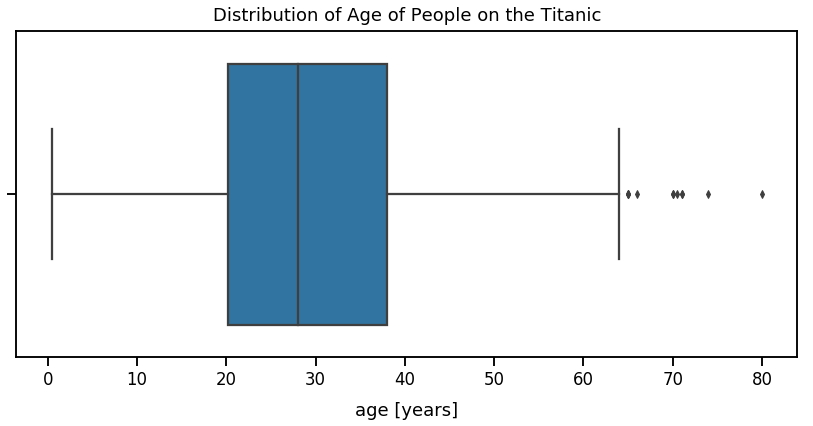

In [5]:
sns.set_context("talk")
plt.figure(figsize=(14, 6))
sns.boxplot(x=df[df['age'].notnull()]['age'])
plt.title("Distribution of Age of People on the Titanic", y=1.015)
plt.xlabel("age [years]", labelpad=13);

#### Question 4: Between what two ages, at the 25th and 75th percentile, are these ~50% of people on the Titanic?

Hint: you can use Pandas `quantile()` method to find the 25th and 75th percentile: https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.Series.quantile.html. Alternatively, you can see the output with Pandas `describe()` method: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.describe.html

In [9]:
df['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

20.125 and 38 years old

#### Question 5: How many outliers are there based on people's age on the Titanic?

Outliers should be visible on your Seaborn plot. Seaborn uses a calculation for outliers based on the popular inter-quartile range method.

In [14]:
twenty_fifth_percentile = df['age'].quantile(.25)
seventy_fifth_percentile = df['age'].quantile(.75)
iqr = seventy_fifth_percentile - twenty_fifth_percentile

In [20]:
high_outlier_bound = seventy_fifth_percentile + (iqr*1.5)

In [21]:
high_outlier_bound

64.8125

In [23]:
len(df[df['age']>high_outlier_bound])

11

The correct answer is 11. However, I mentioned you could just look at the plot visually and count the number of outliers which would give 7. I'll accept both answers due to my mistake. 

The reason 7 is incorrect is there are overlapping points on the box plot so visually it looks like 7, but it's actually 11.

#### Question 6: What was the oldest age person on the Titanic?

Hint: you can use the `max()` method found here: https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.Series.max.html

Please answer this question programmatically.

In [24]:
df['age'].max()

80.0

#### Question 7: What was the youngest (minimum) aged person on the Titanic?

Please answer this question programmatically.

In [25]:
df['age'].min()

0.41999999999999998

#### Question 8: Draw three box plots on the same axes/plot to compare the ages of men, women and children on the Titanic using Seaborn

- Orientation of both box plots should be vertical
- Make sure the x-axis and y-axis have proper labels
- Include a detailed title
- Make the plot's figure size 12 inches wide by 8 inches in height
- Make the font sizes larger for: title, x-ticks, y-ticks, y-label and x-label

Seaborn's box plot functionality: https://seaborn.pydata.org/generated/seaborn.boxplot.html

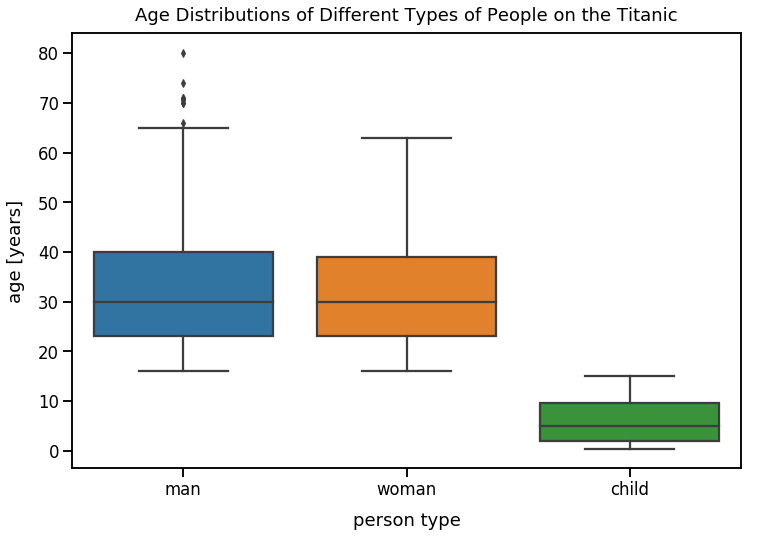

In [26]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="who", y="age", data=df, orient='v')
plt.title("Age Distributions of Different Types of People on the Titanic", y=1.015)
plt.xlabel("person type", labelpad=13)
plt.ylabel("age [years]", labelpad=13);

#### Question 9: Which person type (`who` field) has the largest range of ages?

Documentation on what is the definition of range: https://www.mathsisfun.com/definitions/range-statistics-.html

Men

### Question 10: Create a horizontal bar plot of count of people for the `who` field using Seaborn

- Make sure the x-axis and y-axis have proper labels
- Include a detailed title
- Make the plot's figure size 9 inches wide by 6 inches in height
- Make the font sizes larger for: title, x-ticks, y-ticks, y-label and x-label

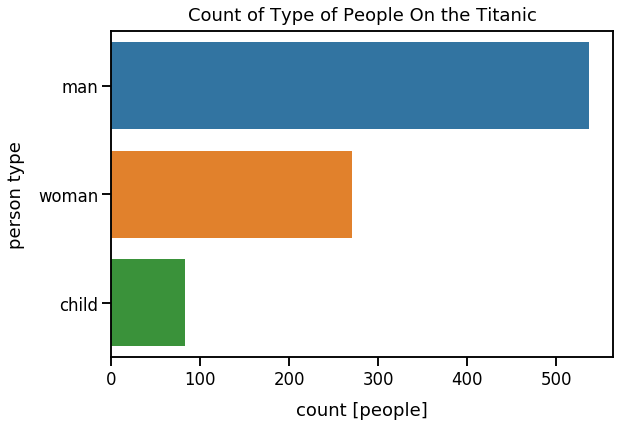

In [27]:
plt.figure(figsize=(9, 6))
sns.countplot(y="who", data=df, orient='h')
plt.title("Count of Type of People On the Titanic", y=1.015)
plt.xlabel("count [people]", labelpad=13)
plt.ylabel("person type", labelpad=13);

#### Question 11: Were there more woman and children combined, or just men on the Titanic?

In [28]:
len(df[df['who'].isin(['woman', 'child'])==True])

354

In [29]:
len(df[df['who']=='man'])

537

Men